# Task 2 数据分析

Tip: 此部分为零基础入门数据挖掘的 Task2 EDA-数据探索性分析 部分，带你来了解数据，熟悉数据，和数据做朋友，欢迎大家后续多多交流。

**赛题：心电图心跳信号多分类预测**

## 2.1 EDA 目标

- EDA的价值主要在于熟悉数据集，了解数据集，对数据集进行验证来确定所获得数据集可以用于接下来的机器学习或者深度学习使用。
- 当了解了数据集之后我们下一步就是要去了解变量间的相互关系以及变量与预测值之间的存在关系。
- 引导数据科学从业者进行数据处理以及特征工程的步骤,使数据集的结构和特征集让接下来的预测问题更加可靠。
- 完成对于数据的探索性分析，并对于数据进行一些图表或者文字总结并打卡。

## 2.2 内容介绍

1. 载入各种数据科学以及可视化库:
   - 数据科学库 pandas、numpy、scipy；
   - 可视化库 matplotlib、seabon；
2. 载入数据：
   - 载入训练集和测试集；
   - 简略观察数据(head()+shape)；
3. 数据总览:
   - 通过describe()来熟悉数据的相关统计量
   - 通过info()来熟悉数据类型
4. 判断数据缺失和异常
   - 查看每列的存在nan情况
   - 异常值检测
5. 了解预测值的分布
   - 总体分布概况
   - 查看skewness and kurtosis
   - 查看预测值的具体频数

## 2.3 代码示例

#### 2.3.1 载入各种数据科学与可视化库

In [2]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
#### 2.3.2 载入训练集和测试集

import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
Train_data = pd.read_csv('./data/train.csv')

In [4]:
# **导入测试集testA.csv**
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt 
Test_data = pd.read_csv('./data/testA.csv')

In [6]:
# **所有特征集均脱敏处理(方便大家观看)**

# - id - 心跳信号分配的唯一标识
# - heartbeat_signals - 心跳信号序列
# - label - 心跳信号类别（0、1、2、3）

Train_data.head().append(Train_data.tail())
Train_data.shape

(100000, 3)

In [7]:
# **观察train首尾数据**
Train_data.head().append(Train_data.tail())

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0
99995,99995,"1.0,0.677705342021188,0.22239242747868546,0.25...",0.0
99996,99996,"0.9268571578157265,0.9063471198026871,0.636993...",2.0
99997,99997,"0.9258351628306013,0.5873839035878395,0.633226...",3.0
99998,99998,"1.0,0.9947621698382489,0.8297017704865509,0.45...",2.0
99999,99999,"0.9259994004527861,0.916476635326053,0.4042900...",0.0


In [8]:
# **观察testA首尾数据**
Test_data.head().append(Test_data.tail())

,id,heartbeat_signals
0,100000,"0.9915713654170097,1.0,0.6318163407681274,0.13..."
1,100001,"0.6075533139615096,0.5417083883163654,0.340694..."
2,100002,"0.9752726292239277,0.6710965234906665,0.686758..."
3,100003,"0.9956348033996116,0.9170249621481004,0.521096..."
4,100004,"1.0,0.8879490481178918,0.745564725322326,0.531..."
19995,119995,"1.0,0.8330283177934747,0.6340472606311671,0.63..."
19996,119996,"1.0,0.8259705825857048,0.4521053488322387,0.08..."
19997,119997,"0.951744840752379,0.9162611283848351,0.6675251..."
19998,119998,"0.9276692903808186,0.6771898159607004,0.242906..."
19999,119999,"0.6653212231837624,0.527064114047737,0.5166625..."


In [9]:
# **观察testA数据集的行列信**

Test_data.shape

(20000, 2)

#### 2.3.3 总览数据概况

1. describe种有每列的统计量，个数count、平均值mean、方差std、最小值min、中位数25% 50% 75% 、以及最大值 看这个信息主要是瞬间掌握数据的大概的范围以及每个值的异常值的判断，比如有的时候会发现999 9999 -1 等值这些其实都是nan的另外一种表达方式，有的时候需要注意下
2. info 通过info来了解数据每列的type，有助于了解是否存在除了nan以外的特殊符号异常

`data.describe()`——获取数据的相关统计量

`data.info()`——获取数据类型

**获取train数据的相关统计量**


In [11]:
Train_data.info()
Train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   heartbeat_signals  100000 non-null  object 
 2   label              100000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


,id,label
count,100000.000000,100000.000000
mean,49999.500000,0.856960
std,28867.657797,1.217084
min,0.000000,0.000000
25%,24999.750000,0.000000
50%,49999.500000,0.000000
75%,74999.250000,2.000000
max,99999.000000,3.000000


In [12]:
# **获取testA数据的相关统计量**
Test_data.info()
Test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 20000 non-null  int64 
 1   heartbeat_signals  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


,id
count,20000.000000
mean,109999.500000
std,5773.647028
min,100000.000000
25%,104999.750000
50%,109999.500000
75%,114999.250000
max,119999.000000



#### 2.3.4 判断数据缺失和异常

`data.isnull().sum()`——查看每列的存在nan情况

**查看trian每列的存在nan情况**

In [13]:
Train_data.isnull().sum()

id                   0
heartbeat_signals    0
label                0
dtype: int64

In [14]:
Test_data.isnull().sum()

id                   0
heartbeat_signals    0
dtype: int64

In [15]:
### 2.3.5 了解预测值的分布
Train_data['label']

0        0.0
1        0.0
2        2.0
3        0.0
4        2.0
        ... 
99995    0.0
99996    2.0
99997    3.0
99998    2.0
99999    0.0
Name: label, Length: 100000, dtype: float64

In [16]:
Train_data['label'].value_counts()

0.0    64327
3.0    17912
2.0    14199
1.0     3562
Name: label, dtype: int64

<AxesSubplot:title={'center':'Log Normal'}, xlabel='label'>

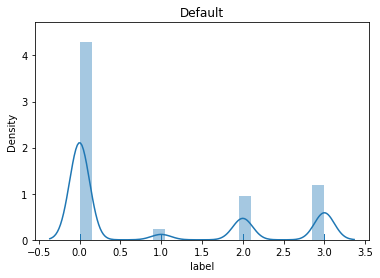

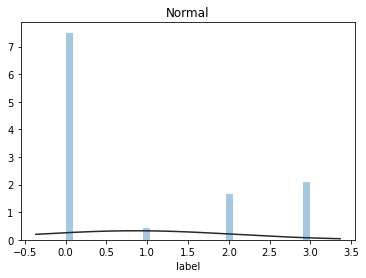

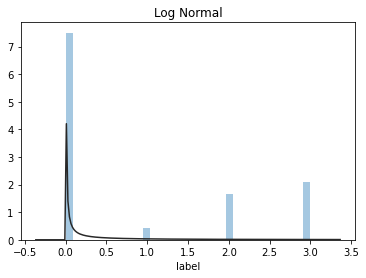

In [17]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['label']
plt.figure(1); plt.title('Default')
sns.distplot(y, rug=True, bins=20)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 0.871005
Kurtosis: -1.009573


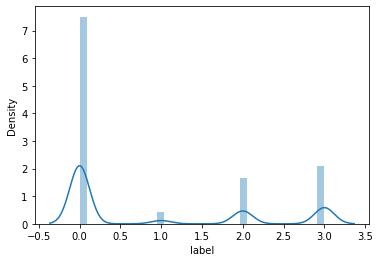

In [18]:
# 2）查看skewness and kurtosis
sns.distplot(Train_data['label']);
print("Skewness: %f" % Train_data['label'].skew())
print("Kurtosis: %f" % Train_data['label'].kurt())

In [19]:
Train_data.skew(), Train_data.kurt()

(id       0.000000
 label    0.871005
 dtype: float64,
 id      -1.200000
 label   -1.009573
 dtype: float64)

<AxesSubplot:xlabel='Kurtness', ylabel='Density'>

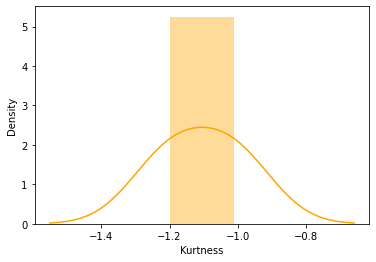

In [20]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

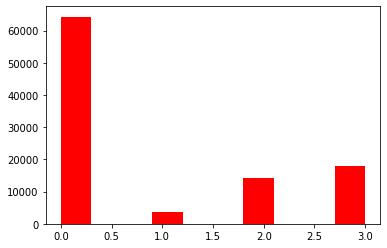

In [21]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['label'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

In [23]:
### 2.3.7 用pandas_profiling生成数据报告
import pandas_profiling

pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./data/example.html")

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.4 总结

数据探索性分析是我们初步了解数据，熟悉数据为特征工程做准备的阶段，甚至很多时候EDA阶段提取出来的特征可以直接当作规则来用。可见EDA的重要性，这个阶段的主要工作还是借助于各个简单的统计量来对数据整体的了解，分析各个类型变量相互之间的关系，以及用合适的图形可视化出来直观观察。希望本节内容能给初学者带来帮助，更期待各位学习者对其中的不足提出建议。